In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 35

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('advanced_features.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,q1_clean,q2_clean,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154,step step guid invest share market india,step step guid invest share market,1,6.5,0.153846,5,6,0.833333,6,0.923077,92,98,92,100,0.000011,0.025243,35.639119,39.982959,0.891358
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952,stori kohinoor koh noor diamond,would happen indian govern stole kohinoor koh noor diamond back,5,7.5,0.666667,4,11,0.363636,4,0.533333,64,91,62,89,0.000074,0.233014,44.813524,90.737799,0.493879
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000,increas speed internet connect use vpn,internet speed increas hack dn,1,5.5,0.181818,3,8,0.375000,1,0.181818,66,67,71,85,0.000053,0.530295,19.995960,57.294716,0.349002
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000,whi mental veri lone solv,find remaind math 23 24 math divid 24 23,4,7.0,0.571429,0,11,0.000000,0,0.000000,44,56,15,19,0.000117,1.000000,0.000000,80.610728,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000,one dissolv water quikli sugar salt methan carbon di oxid,fish would surviv salt water,5,7.5,0.666667,2,13,0.153846,1,0.133333,52,64,42,53,0.000117,0.764240,14.865222,110.922613,0.134014


In [6]:
data.shape

(404124, 33)

In [7]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio',
         'fuzz_simple_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio',
         'hamming_distance', 'cosine_distance',
         'weighted_intersection', 'weighted_union', 'jaccard_similarity_weighted',
]
target = 'is_duplicate'

In [8]:
data = data[feats+[target]]

In [9]:
print(len(data[data[target] ==1]))
print(len(data[data[target] ==0]))

149258
254866


In [10]:
# Oversampling

data = pd.concat([data[data[target] ==1], data[data[target] ==1].sample(frac=0.71), data[data[target] ==0]]).sample(frac=1.00)
print(len(data[data[target] ==1]))
print(len(data[data[target] ==0]))

255231
254866


In [11]:
data

,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted,is_duplicate
54712,1,8.5,0.117647,6,11,0.545455,6,0.705882,0,5.0,0.000000,5,5,1.000000,5,1.000000,100,100,100,100,0.000000,0.000000,30.193103,30.193103,1.000000,1
200909,10,11.0,0.909091,0,22,0.000000,0,0.000000,8,7.0,1.142857,0,14,0.000000,0,0.000000,30,48,17,17,0.000148,1.000000,0.000000,125.553094,0.000000,0
50406,2,6.0,0.333333,3,9,0.333333,3,0.500000,2,4.0,0.500000,3,5,0.600000,3,0.750000,76,96,76,100,0.000021,0.157383,15.313756,23.298347,0.657289,0
221165,1,6.5,0.153846,2,11,0.181818,2,0.307692,1,3.5,0.285714,3,4,0.750000,3,0.857143,87,96,87,100,0.000011,0.059703,20.813818,25.187311,0.826361,1
63929,0,8.0,0.000000,5,11,0.454545,5,0.625000,1,4.5,0.222222,3,6,0.500000,3,0.666667,63,71,60,83,0.000032,0.301641,22.746775,43.219598,0.526307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163992,1,13.5,0.074074,4,21,0.190476,3,0.222222,0,5.0,0.000000,3,7,0.428571,3,0.600000,59,62,75,75,0.000042,0.504964,19.055034,49.929426,0.381639,1
273526,4,12.0,0.333333,7,17,0.411765,6,0.500000,0,4.0,0.000000,3,5,0.600000,3,0.750000,85,82,71,86,0.000021,0.273673,17.158856,29.287427,0.585878,1
115417,0,13.0,0.000000,5,21,0.238095,5,0.384615,1,6.5,0.153846,4,9,0.444444,4,0.615385,74,74,57,67,0.000053,0.415415,25.815840,59.301873,0.435329,1
174700,0,5.0,0.000000,2,8,0.250000,2,0.400000,0,3.0,0.000000,2,4,0.500000,2,0.666667,89,89,72,84,0.000021,0.205700,14.905776,25.311732,0.588888,0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

data[feats] = sc.fit_transform(data[feats])

In [14]:
data.head()

,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted,is_duplicate
54712,-0.539393,-0.479713,-0.641442,0.491296,-0.684492,0.936066,0.514043,1.077626,-0.762349,-0.253113,-1.049966,1.156553,-0.660649,1.989517,1.245360,1.689573,1.653775,1.550145,1.651331,0.983468,-1.064951,-1.444410,0.769125,-0.763647,1.939377,1
200909,1.460712,0.039023,2.288178,-1.464718,0.745618,-1.415056,-1.344293,-1.652736,2.485509,0.459426,2.899000,-1.728250,1.284016,-1.723505,-1.595450,-2.014995,-1.978969,-1.724326,-2.362283,-2.837648,1.929298,2.167531,-1.676664,1.973333,-1.704905,0
50406,-0.317159,-0.998448,0.156945,-0.486711,-0.944512,0.021741,-0.415125,0.281270,0.049615,-0.609383,0.677706,0.002632,-0.660649,0.504308,0.109036,0.763431,0.408263,1.298262,0.490768,0.983468,-0.637201,-0.875951,-0.436175,-0.961537,0.690443,0
221165,-0.539393,-0.894701,-0.507447,-0.812713,-0.684492,-0.631348,-0.724848,-0.462578,-0.356367,-0.787518,-0.062725,0.002632,-0.876723,1.061261,0.109036,1.160349,0.979123,1.298262,1.022692,0.983468,-0.851076,-1.228765,0.009357,-0.907321,1.306588,1
63929,-0.761627,-0.583460,-1.076927,0.165294,-0.684492,0.544213,0.204320,0.764772,-0.356367,-0.431248,-0.282112,0.002632,-0.444575,0.133006,0.109036,0.454717,-0.266390,-0.276002,-0.282941,0.200829,-0.423326,-0.354900,0.165936,-0.389766,0.213106,1


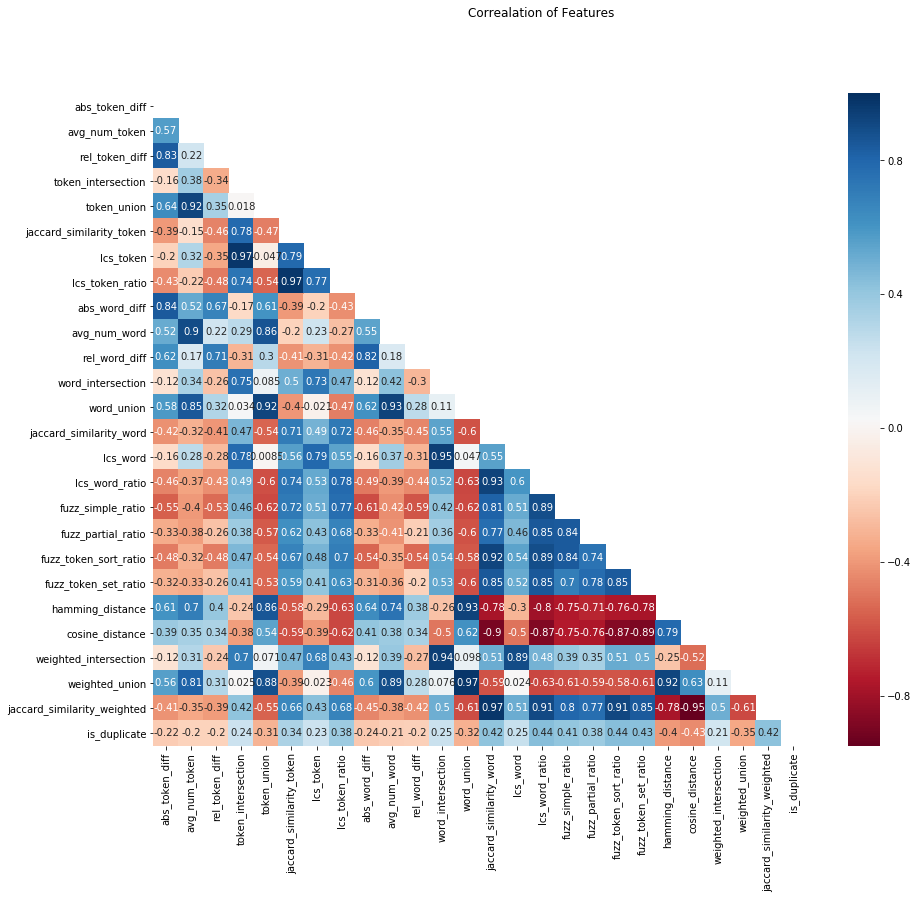

In [15]:
fig, ax = plt.subplots(figsize=(15,12))
fig.suptitle('Correalation of Features')

d = data[feats+[target]].corr()
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True

sns.heatmap(d, mask=mask, square=True, annot=True, cmap='RdBu')

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [17]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [18]:
def build_network():
    model = Sequential()
    model.add(Dense(32,input_dim=len(feats), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = build_network()

history = model.fit(data[feats], data[target], validation_split=0.3, epochs=256, callbacks=[es, ckpt], verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              33792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 35,649
Trainable params: 35,649
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.

Epoch 00001: loss improved from in

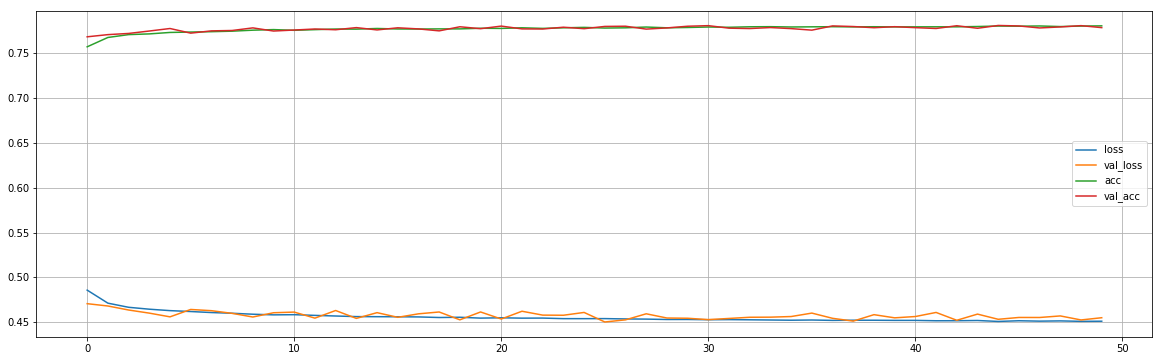

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))

for metric in ['loss', 'val_loss', 'acc', 'val_acc']:
    ax.plot(history.history[metric], label=metric)
    

ax.grid()
ax.legend()
    